# Tarea 7. Estimación del riesgo sistemático ($\beta$).

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea aplicarás la técnica aprendida en clase para la estimación del coeficiente de riesgo sistemático $\beta$, el cual es primordial en el modelo de valoración de activos en equilibrio CAPM.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea7_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea7_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Selección de activos (10 puntos)

Seleccionar cinco (5) activos de su preferencia del S&P500 y enunciarlos en una celda en formato Markdown.

## 2. Descarga de datos (10 puntos)

Descargar los precios mensuales ajustados en el cierre para el índice S&P 500 (^GSPC).

1. Graficar los precios (5 puntos).
2. Graficar los rendimientos (5 puntos).

In [2]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline

yf.pdr_override()

In [3]:
def get_closes(tickers, start_date=None, end_date=None):
    closes = web.get_data_yahoo(tickers=tickers, start=start_date, end=end_date)['Adj Close']
    closes.sort_index(inplace=True)
    return closes

tickers = ["^GSPC", "MSFT", "WBA", "TSLA", "AMZN"]
closes = get_closes(tickers, "2015-01-01")
closes

[*********************100%***********************]  5 of 5 completed


,AMZN,MSFT,TSLA,WBA,^GSPC
Date,,,,,
2015-01-02,15.426000,40.709469,14.620667,59.285892,2058.199951
2015-01-05,15.109500,40.335106,14.006000,58.115776,2020.579956
2015-01-06,14.764500,39.743088,14.085333,58.263996,2002.609985
2015-01-07,14.921000,40.248051,14.063333,59.753944,2025.900024
2015-01-08,15.023000,41.432064,14.041333,60.495037,2062.139893
...,...,...,...,...,...
2023-04-12,97.830002,283.489990,180.539993,35.689999,4091.949951
2023-04-13,102.400002,289.839996,185.899994,35.779999,4146.220215
2023-04-14,102.510002,286.140015,185.000000,35.320000,4137.640137


<AxesSubplot:xlabel='Date'>

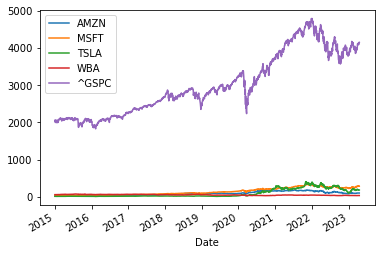

In [4]:
closes.plot()

In [7]:
# Instalar la última versión de yfinance 
# para el funcionamiento de yfinance.Ticker().info 

## Instalación: "conda install -c conda-forge yfinance" en Anaconda prompt
def get_beta(tkr):
    ticker = yf.Ticker(tkr)
    info = ticker.info
    return info.get("beta")

# Obtener betas desde Yahoo Finance
b_amzn = get_beta("AMZN")
b_amzn

1.262975

## 3. Calculando los coeficientes $\beta$ (50 puntos)

Usando los datos de rendimientos mensuales calculados en el punto anterior:

1. Estime el valor del coeficiente de riesgo sistemático $\beta$ para cada uno de los activos seleccionados, con el método visto en clase (5 puntos por cada activo).
2. Compare su estimación de $\beta$ con el valor reportado en Yahoo! Finance mediante el error relativo: 
$$e_{relativo}=\frac{\beta_{estimado}-\beta_{Yahoo!}}{\beta_{Yahoo!}}.$$
Concluya de acuerdo al valor del error relativo obtenido (5 puntos por cada activo).

## 4. Gráfico y conclusiones (30 puntos)

1. Grafique cada uno de los activos en el espacio de $E[r]$ (eje $y$) vs. $\beta$ (eje $x$) (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. De la ecuación obtenida, identifique el valor de la tasa libre de riesgo $r_f$, y el valor del rendimiento esperado del portafolio de mercado $E[r_M]$. Compare este último con el rendimiento esperado del índice S&P500 (10 puntos).

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>